<a href="https://colab.research.google.com/github/kamangirkhan/Data110/blob/main/Project%201/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

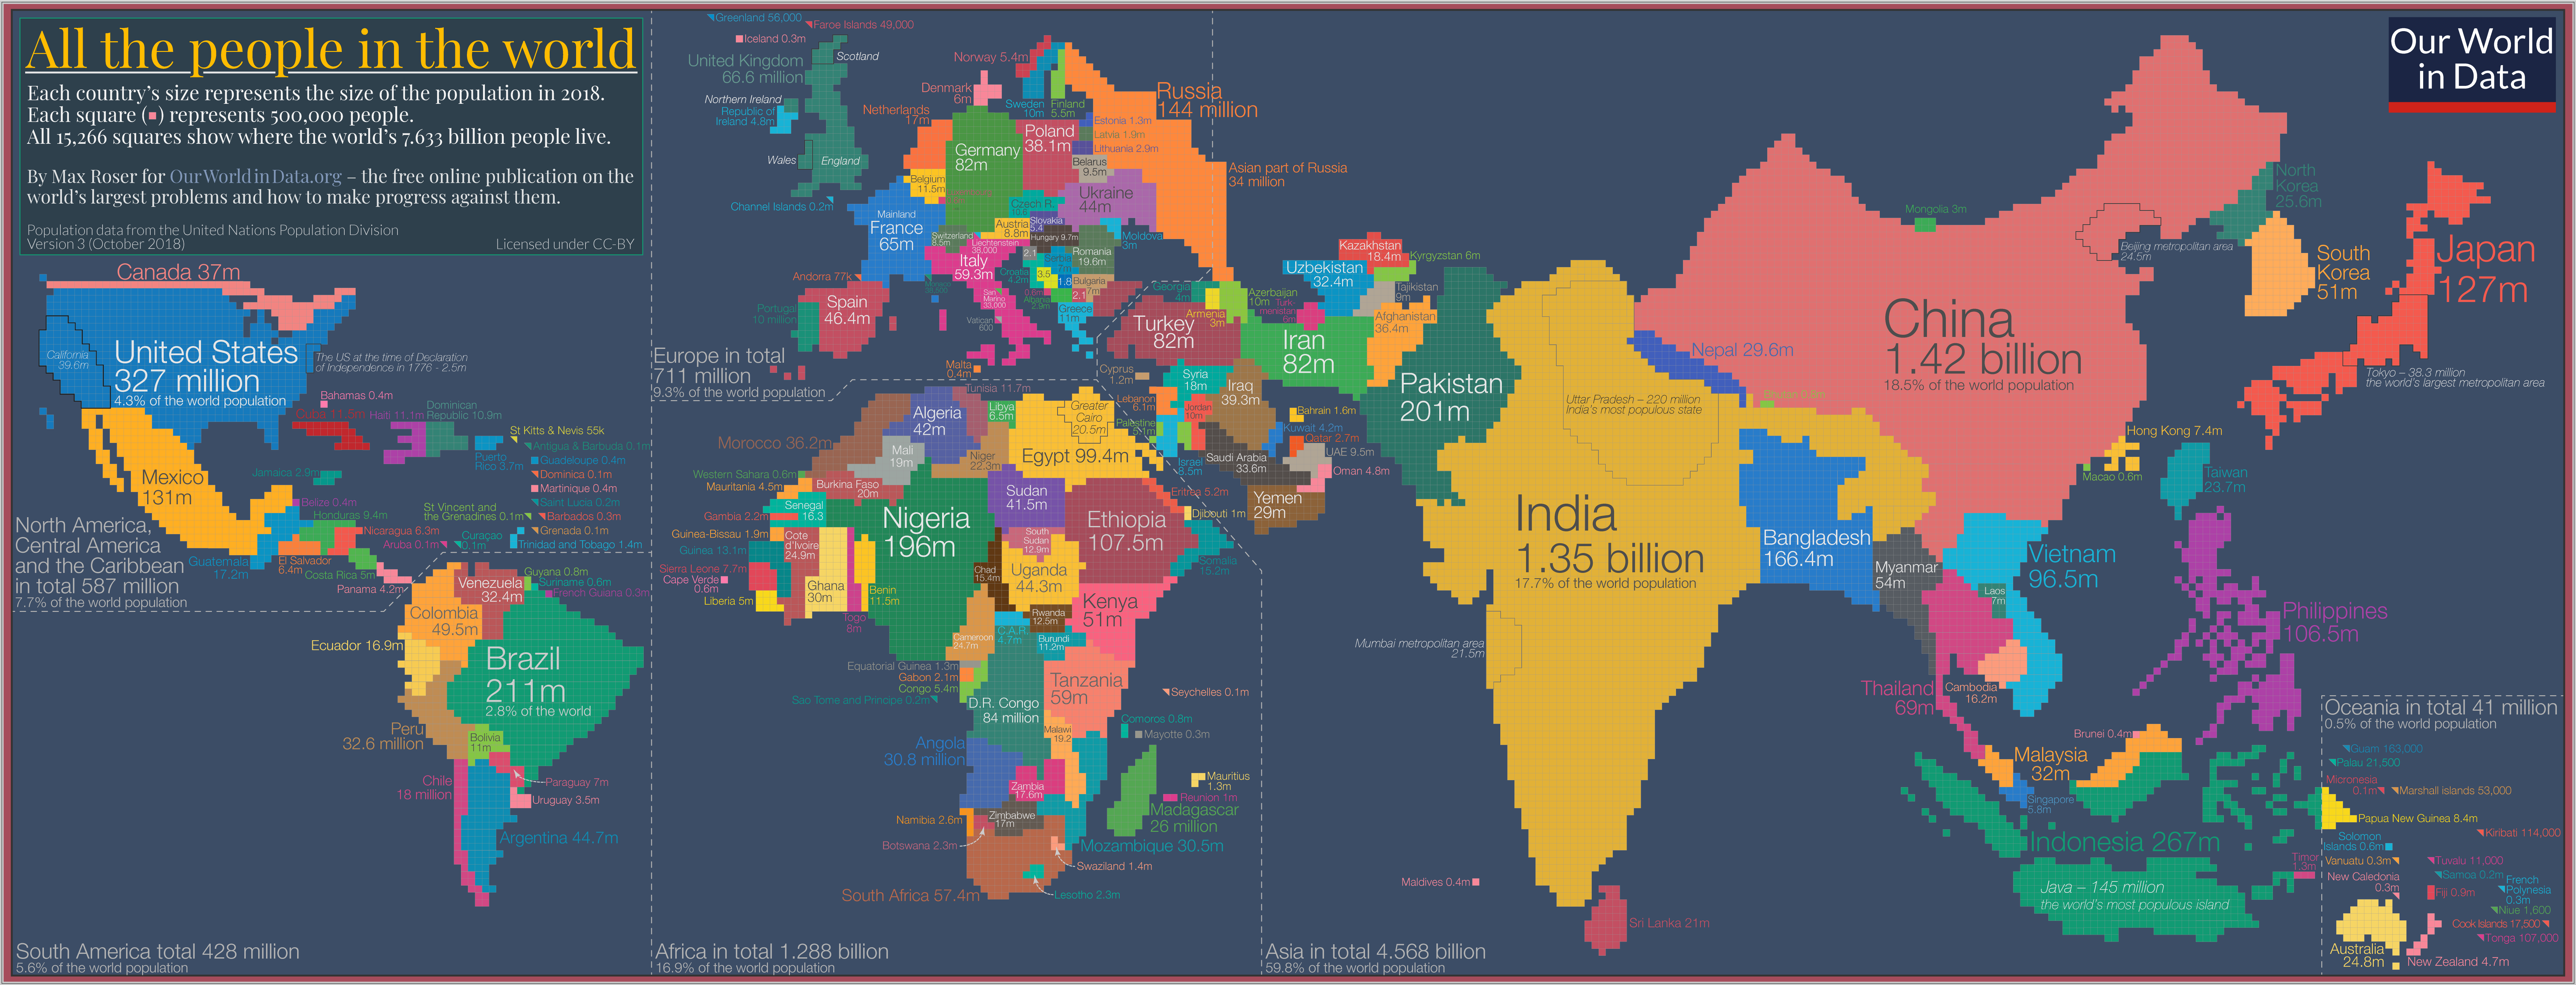

# **Introduction**
The global population has been growing at varying rates across different regions of the world.

**"How has population growth and density changed over time across different regions of the world?"**  

For this analysis, I used the **population dataset**, which contains population estimates for different world regions from **1950 to 2023**.  
To answer this question, I focused on the following **key columns** from the dataset:
- **`year`** – The year of the population estimate.
- **`area`** – The geographical region (e.g., Asia, Africa, Europe).
- **`population`** – The total population of each region.
- **`natural_population_growth_rate`** – The annual growth rate in percentage.
- **`population_density`** – The number of people per square kilometer.

# **Data Analysis**
I performed the following **data analysis steps**:

1. **Data Cleaning & Filtering:**  
   - Ensure that only relevant regions are included.
   - Remove unnecessary columns.
   - Filter the dataset to focus on every **10 years from 1973 to 2023**.
   
2. **Exploratory Data Analysis (EDA):**  
   - Calculate key summary statistics for **population and density**.
   - Identify trends and regional variations.

3. **Data Visualization:**  
   - **Bar Charts** to compare population sizes.
   - **Line Plots** for **growth rates** and **population density trends**.
   - **Pie Charts** to show the **distribution of the global population** in specific years.

In [2]:
import pandas as pd

pop = pd.read_csv("/content/population.csv")

pop['area'] = pop['area'].str.replace(r" \(UN\)", "", regex=True)
pop['area'] = pop['area'].replace("Latin America and the Caribbean", "Latin America")

regions = ["Asia", "Africa", "Europe", "Latin America", "Northern America", "Oceania"]

con_pop = pop[pop['area'].isin(regions)]

print(con_pop.head())


      area  year  population  sex_ratio  birth_rate  death_rate  \
74  Africa  1950   227776419  99.442200      47.760      26.896   
75  Africa  1951   232556971  99.342720      47.896      26.404   
76  Africa  1952   237539544  99.262350      47.986      25.980   
77  Africa  1953   242685066  99.195045      48.084      25.574   
78  Africa  1954   248005818  99.129060      48.080      25.253   

    population_density   natural_population_growth_rate  0-4 years  \
74                7.708                          2.0864   39266189   
75                7.870                          2.1492   40126541   
76                8.038                          2.2006   41065383   
77                8.212                          2.2510   42145341   
78                8.392                          2.2827   43327679   

    5-14 years  15-24 years  25-64 years  65+ years  
74    55452970     43352340     82152559    7551740  
75    56700755     44149206     83912963    7666887  
76    58023704

##**Population Distribution in 1973 (Pie Chart)**

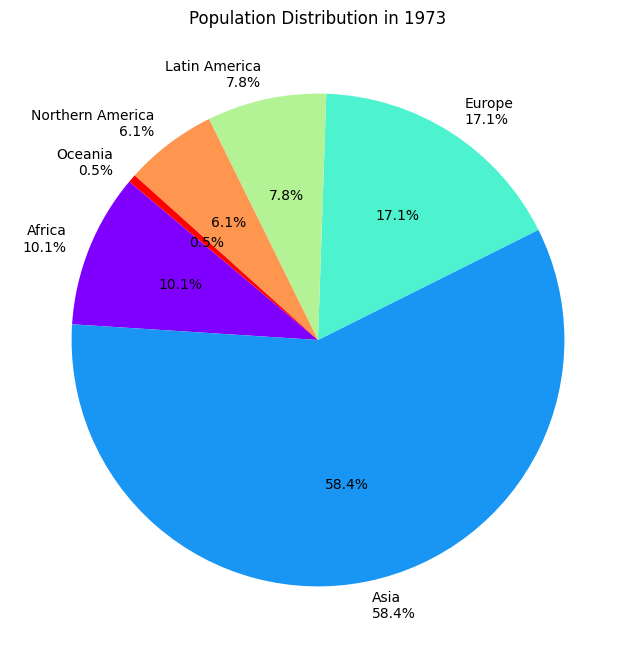

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

con_pop_1973 = con_pop[con_pop['year'] == 1973].copy()

con_pop_1973['percentage'] = (con_pop_1973['population'] / con_pop_1973['population'].sum()) * 100

labels = [f"{area}\n{round(perc, 1)}%" for area, perc in zip(con_pop_1973['area'], con_pop_1973['percentage'])]

num_regions = len(con_pop_1973)
colors = plt.cm.rainbow(np.linspace(0, 1, num_regions))

plt.figure(figsize=(8, 8))
plt.pie(con_pop_1973['population'], labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

plt.title("Population Distribution in 1973")

plt.show()



##**Population Growth Rate Over Time (1973-2023, every 10 years, Line Chart))**

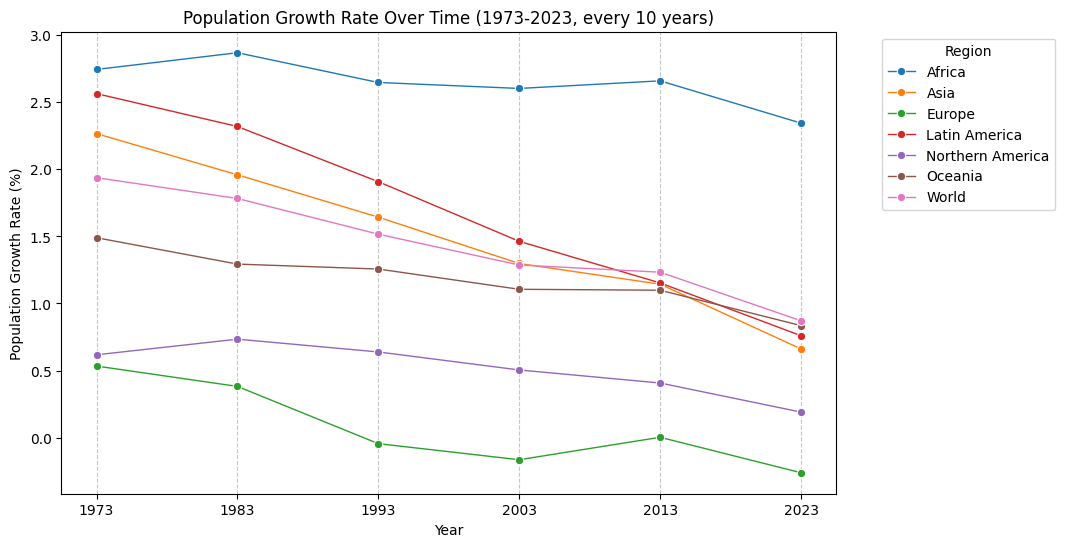

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

world = ["Asia", "Africa", "Europe", "Latin America", "Northern America", "Oceania", "World"]

world_pop = pop[pop['area'].isin(world)]

world_pop_time_growth = world_pop[(world_pop['year'] % 10 == 3) & (world_pop['year'].between(1973, 2023))]

plt.figure(figsize=(10, 6))

sns.lineplot(data=world_pop_time_growth, x="year", y="natural_population_growth_rate", hue="area", marker="o", linewidth=1)

plt.title("Population Growth Rate Over Time (1973-2023, every 10 years)")
plt.xlabel("Year")
plt.ylabel("Population Growth Rate (%)")
plt.xticks(range(1973, 2024, 10))
plt.grid(axis='x', linestyle="--", alpha=0.7)
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.show()


##**Population Density Over Time (1973-2023, every 10 years, Line Chart)**

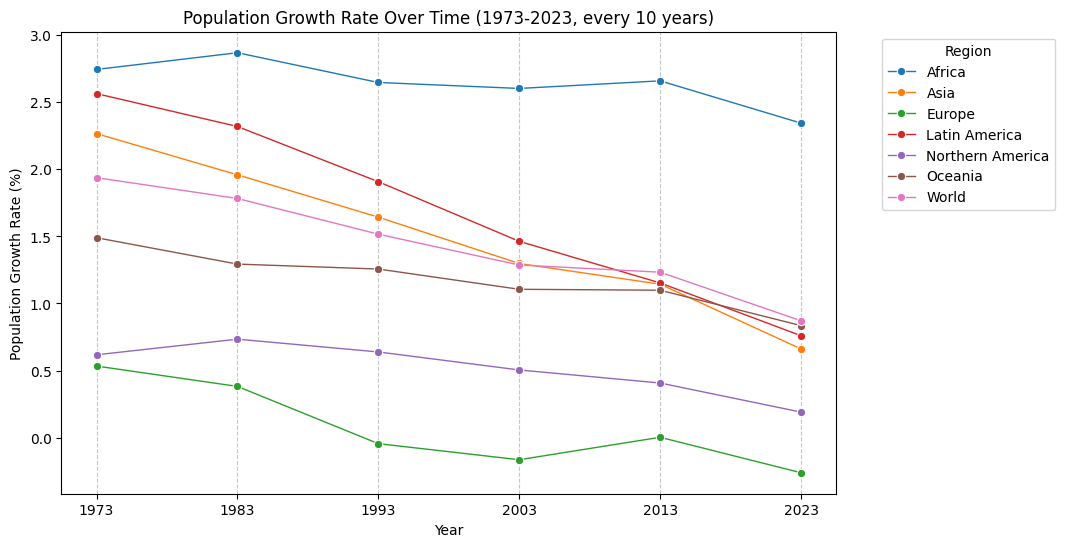

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

world_pop = pop[pop['area'].isin(world)]

world_pop_time_growth = world_pop[(world_pop['year'] % 10 == 3) & (world_pop['year'].between(1973, 2023))]

plt.figure(figsize=(10, 6))

sns.lineplot(data=world_pop_time_growth, x="year", y="natural_population_growth_rate", hue="area", marker="o", linewidth=1)

plt.title("Population Growth Rate Over Time (1973-2023, every 10 years)")
plt.xlabel("Year")
plt.ylabel("Population Growth Rate (%)")
plt.xticks(range(1973, 2024, 10))
plt.grid(axis='x', linestyle="--", alpha=0.7)
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.show()


##**Population Distribution in 2023 (Pie Chart)**

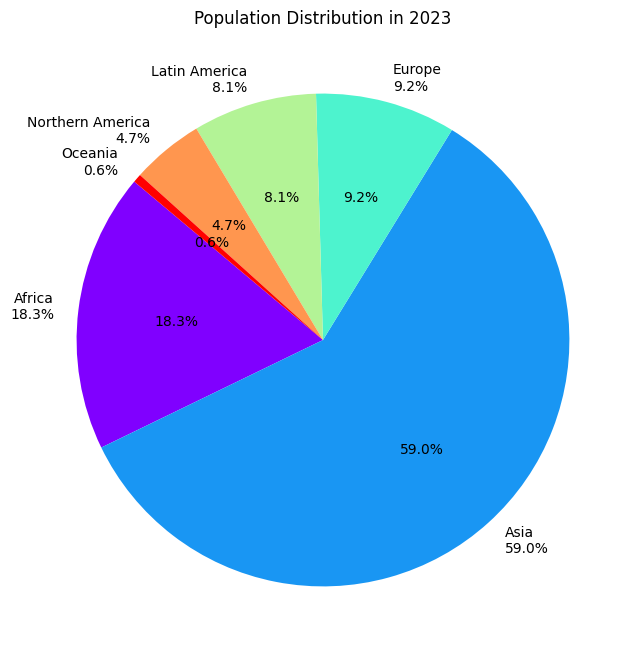

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

con_pop_2023 = con_pop[con_pop['year'] == 2023].copy()

con_pop_2023['percentage'] = (con_pop_2023['population'] / con_pop_2023['population'].sum()) * 100

labels = [f"{area}\n{round(perc, 1)}%" for area, perc in zip(con_pop_2023['area'], con_pop_2023['percentage'])]

num_regions = len(con_pop_2023)
colors = plt.cm.rainbow(np.linspace(0, 1, num_regions))

plt.figure(figsize=(8, 8))
plt.pie(con_pop_2023['population'], labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

plt.title("Population Distribution in 2023")

plt.show()


##**Population Comparison by Region (1973 vs. 2023, Side-by-Side Bar Chart)**

<ipython-input-14-c2c00027aaaf>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world_pop_bar['population_billion'] = world_pop_bar['population'] / 1e9


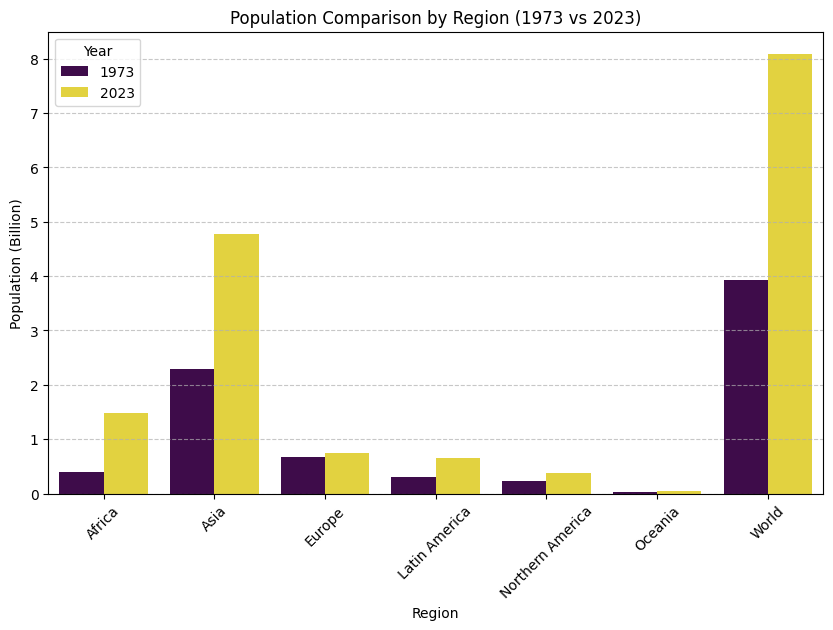

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

world_pop_bar = world_pop[world_pop['year'].isin([1973, 2023])]

world_pop_bar['population_billion'] = world_pop_bar['population'] / 1e9

plt.figure(figsize=(10, 6))

sns.barplot(data=world_pop_bar, x="area", y="population_billion", hue="year", palette="viridis")

plt.title("Population Comparison by Region (1973 vs 2023)")
plt.xlabel("Region")
plt.ylabel("Population (Billion)")
plt.xticks(rotation=45)
plt.legend(title="Year")
plt.grid(axis='y', linestyle="--", alpha=0.7)

plt.show()


##**Population Structure Comparison of World (1973 vs. 2023, Side-by-Side Bar Chart)**

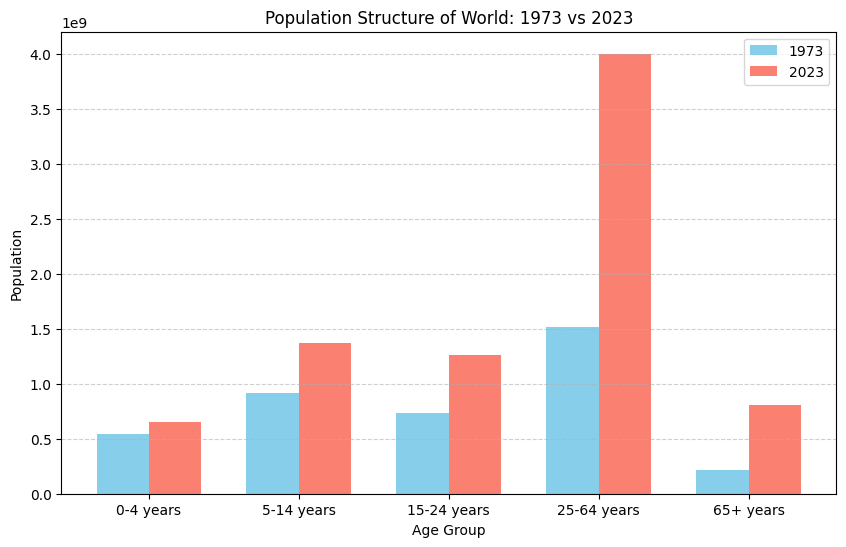

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

age_groups = ['0-4 years', '5-14 years', '15-24 years', '25-64 years', '65+ years']

age_data_1973 = pop[(pop['area'] == "World") & (pop['year'] == 1973)][age_groups].values.flatten()
age_data_2023 = pop[(pop['area'] == "World") & (pop['year'] == 2023)][age_groups].values.flatten()

x = np.arange(len(age_groups))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, age_data_1973, width, label='1973', color='skyblue')
plt.bar(x + width/2, age_data_2023, width, label='2023', color='salmon')

plt.xlabel("Age Group")
plt.ylabel("Population")
plt.title("Population Structure of World: 1973 vs 2023")
plt.xticks(x, age_groups)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


# **Conclusion and Future Directions**

**Summary of Key Findings:**

- Asia remains the most populated region, with a large portion of the global population.

- Africa’s growth rate is consistently higher than other regions, indicating significant population expansion.

- Population density trends show that Europe and Asia have high population densities, while Oceania remains sparsely populated.

- Between 1973 and 2023, Asia and Africa experienced the largest increases in absolute population numbers.

**Implications & Future Research**

- The rapid growth in Africa suggests potential economic and environmental challenges due to increasing demand for resources.

- Declining growth rates in Europe and Asia might lead to aging populations and workforce shortages.
Future studies could analyze migration trends, urbanization, energy, and economic factors that influence population dynamics.


# **References:**
[Population Dataset](https://ourworldindata.org/population-growth)  
